## Problems

**1.Predicting Boston Housing Prices.** The file `BostonHousing.csv` contains information collected by the US Bureau of the Census concerning housing in the area of Boston, Massachusetts. The dataset includes information on 506 census housing tracts in the Boston area. The goal is to predict the median house price in new tracts based on information such as crime rate, pollution, and number of rooms. The dataset contains 13 predictors, and the outcome variable is the median house price (MEDV). The following describes each of the predictors and the outcome
variable:

    CRIM: Per capita crime rate by town
    ZN: Proportion of residential land zonedfor lots over 25,000 ft squared
    INDUS: Proportion of nonretail business acres per town
    CHAS: Charles River dummy variable (=1 if tract bounds river; =0 otherwise)
    NOX: Nitric oxide concentration (parts per 10 million)
    RM: Average number of rooms per dwelling
    AGE: Proportion of owner-occupied units built prior to 1940
    DIS: Weighted distances to five Boston employment centers
    RAD: Index of accessibility to radial highways
    TAX: Full-value property-tax rate per $10,000
    PTRATIO: Pupil/teacher ratio by town
    LSTAT: Percentage lower status of the population
    MEDV: Median value of owner-occupied

**a.** Why should the data be partitioned into training and validation sets? What will the training set be used for? What will the validation set be used for?

When we use the same data both to develop the model and to assess its performance, we introduce an "optimism" bias. This is because when we choose the model that works best with the data, this model's superior performance comes from two sources:

- A superior model
- Chance aspects of the data that happen to match the chosen model better than they match other models

The latter is a particularly serious problem with techniques (such as trees and neural nets) that do not impose linear or other structure on the data, and thus end up overfitting it.

To address the overfitting problem, we simply divide (partition) our data and develop our model using only one of the partitions. After we have a model, we try it out on another partition and see how it performs, which we can measure in several ways. In a classification model, we can count the proportion of held-back records that were misclassified. In a prediction model, we can measure the residuals (prediction errors) between the predicted values and the actual values. This evaluation approach in effect mimics the deployment scenario, where our model is applied to data that it hasn't "seen."

**Training Partition**: the training partition, typically the largest partition, contains the data used to build the various models we are examining. The same training partition is generally used to develop multiple models.

**Validation Partition**: the validation partition (sometimes called the test partition) is used to assess the predictive performance of each model so that you can compare models and choose the best one.

**b.** Fit a multiple linear regression model to the median house price (MEDV) as a function of CRIM, CHAS, and RM. Write the equation for predicting the median house price from the predictors in the model.

For the above predictors, we will estimate the coefficients of the regression formula from the data using a method called *ordinary least squares* (OLS). This method finds values $\hat{\beta}_0$, $\hat{\beta}_1$, $\hat{\beta}_2$, ..., $\hat{\beta}_p$, where $\hat{\beta_i}$ is the parameter for the predictor *i*, that minimize the sum of squared deviations between the actual outcome values ($Y$) and their predicted values based on that model ($\hat{Y}$).

To predict the value of the outcome variable for a record with predictor values $x_1$, $x_2$, ..., $x_p$, we use the equation:

<p>
    <center>
        $\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + ... + \hat{\beta}_p x_p$
    </center>
</p>

One very rough rule of thumb is to have a number of records *n* larger than *5(p + 2)*, where *p* is the number of predictors. Since we have 3 predictors, we need at least *5(3 + 2) = 25* records. We have 506 records, so this is not a concern.

Let's estimate the predictors (using all data):

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from dmutils import adjusted_r2_score, AIC_score
from dmutils import exhaustive_search, backward_elimination
from dmutils import forward_selection, stepwise_selection
from dmutils import regression_summary

In [2]:
# load housing data
housing_df = pd.read_csv("../datasets/BostonHousing.csv")
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


In [3]:
# select predictors
predictors = ["CRIM", "CHAS", "RM"]
outcome = "MEDV"

# partition data
X = housing_df[predictors]
y = housing_df[outcome]

housing_lmr = LinearRegression()
housing_lmr.fit(X, y)

# print coefficients
print(pd.DataFrame({'Predictor': X.columns,
                    'coefficient': housing_lmr.coef_}))
# print intercept
print('\nIntercept: ', housing_lmr.intercept_)
# print performance measures (training data)
regression_summary(y, housing_lmr.predict(X))

  Predictor  coefficient
0      CRIM    -0.260724
1      CHAS     3.763037
2        RM     8.278180

Intercept:  -28.810682506359118

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 6.1453
            Mean Absolute Error (MAE) : 4.1782
          Mean Percentage Error (MPE) : -7.3835
Mean Absolute Percentage Error (MAPE) : 22.9616


Therefore, we can write the equation for predicting the median house price as:

<p>
    <center>
        $\hat{MEDV} = -28.81 - 0.26 x_{CRIM} + 3.76 x_{CHAS} + 8.27 x_{RM}$
    </center>
</p>

c. Using the estimated regression model, what median house price is predicted for a tract in the Boston area that does not bound the Charles River, has a crime rate of 0.1, and where the average number of rooms per house is 6?

In [4]:
# the example of a data frame home to be scored using our regression model

new_data = pd.DataFrame({"CHAS": [0], "CRIM": [0.1], "RM": [6]})

print(new_data)
print("\nPredictions: ", housing_lmr.predict(new_data))

   CHAS  CRIM  RM
0     0   0.1   6

Predictions:  [21.23470007]


Thus the predicted MEDV is \\$21.23 (in \\$1000s) for this house. Since there is no data that is exactly the same as the example given above we are not able to calculate the prediction error (residual).

d. Reduce the number of predictors:

    i. Which predictors are likely to be measuring the same thing among the 13 predictors? Discuss the
    relationships among INDUS, NOX, and TAX.

    ii. Compute the correlation table for the 12 numerical predictors and search for highly correlated pairs.
    These have potential redundancy and can cause multicollinearity. Choose which ones to remove based on this
    table.

Let's plot the correlation matrix among variables and check for possible multicollinearity (Multicollinearity is the presence of two or more predictors sharing the same linear relationship with the outcome variable).

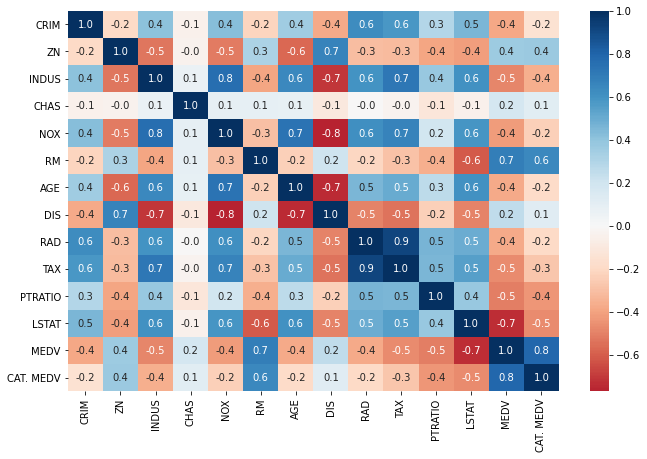

In [5]:
# simple heatmap of correlations (without values)
corr = housing_df.corr()

# include information about values
# (example demonstrate how to control the size of the plot)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
plt.show()

**i.** We can see from the above correlation matrix that the correlation between TAX, INDUS and NOX variables are strong, and positive, correlations (knowing the value of one of these variables gives a hint about the others):

- TAX and INDUS: 0.7
- TAX and NOX: 0.7
- NOX and INDUS: 0.8

**ii.** Other correlations are:

- DIS and INDUS: -0.7
- DIS and TAX: -0.7
- DIS and AGE: -0.7
- DIS and NOX: -0.7

These correlation suggest that the weighted distances to five Boston employment centers are inversely proportional to the proportion of nonretail business acres per town, proportion of owner-occupied units built prior to 1940 (old houses), nitric oxide concentration (pollution, parts per 10 million), and full-value property-tax rate per \\$10,000.

Therefore, these would be good candidates to be removed from the predictor lists as a way to reduce/remove multicollinearity problem.

    iii. Use three subset selection algorithms: backward, forward, and stepwise) to reduce the remaining
    predictors. Compute the validation performance for each of the three selected models. Compare RMSE, MAPE,
    and mean error, as well as histograms of the errors. Finally, describe the best model.

In [6]:
# select predictors (all variables)
predictors = ["CRIM", "ZN", "INDUS", "CHAS", "NOX",
              "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "LSTAT"]

# partition data, 40% test set
X = housing_df[predictors]
y = housing_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                                                      test_size=0.4,
                                                      random_state=1)

- Exhaustive search:

In [7]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[list(variables)])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

all_variables = train_X.columns
results = exhaustive_search(all_variables, train_model, score_model)

data = []
for result in results:
    model = result["model"]
    variables = list(result["variables"])
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)

    d = {"n": result["n"], "r2adj": -result["score"], "AIC": AIC}
    d.update({var: var in result["variables"] for var in sorted(all_variables)})
    data.append(d)

pd.DataFrame(data, columns=("n", "r2adj", "AIC") + tuple(sorted(all_variables)))

,n,r2adj,AIC,AGE,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
0,1,0.572980,1934.913465,False,False,False,False,False,True,False,False,False,False,False,False
1,2,0.651683,1874.178531,False,False,False,False,False,True,False,False,False,True,False,False
2,3,0.687239,1842.541774,False,False,False,False,False,True,False,True,False,True,False,False
3,4,0.693208,1837.687606,False,True,False,False,False,True,False,True,False,True,False,False
4,5,0.708318,1823.366167,False,False,False,True,False,True,True,True,False,True,False,False
5,6,0.714863,1817.467502,False,False,False,True,False,True,True,True,False,True,False,True
6,7,0.721032,1811.815660,False,True,False,True,False,True,True,True,False,True,False,True
7,8,0.723443,1810.156279,False,True,True,True,False,True,True,True,False,True,False,True
8,9,0.727136,1807.050098,False,False,True,True,False,True,True,True,True,True,True,True
9,10,0.731108,1803.571740,False,True,True,True,False,True,True,True,True,True,True,True


- Backward Selection

In [8]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)


all_variables = train_X.columns
best_model, best_variables = backward_elimination(all_variables, train_model, score_model,
                                                  verbose=True)
print(best_variables)
regression_summary(valid_y, best_model.predict(valid_X[best_variables]))

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT
Start: score=1807.23
Step: score=1805.30, remove=AGE
Step: score=1803.57, remove=INDUS
Step: score=1803.57, remove=None
['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

Regression statistics

                      Mean Error (ME) : -0.0393
       Root Mean Squared Error (RMSE) : 5.0771
            Mean Absolute Error (MAE) : 3.5746
          Mean Percentage Error (MPE) : -5.1561
Mean Absolute Percentage Error (MAPE) : 16.9733


Percentage of datapoints with a residual in [-5, 5]:  0.7684729064039408


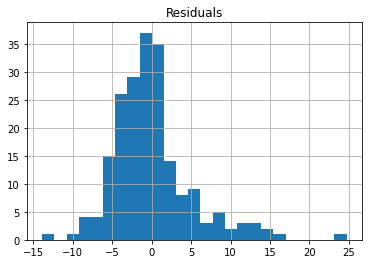

In [9]:
all_residuals = valid_y - best_model.predict(valid_X[best_variables])

# Determine the percentage of datapoints with a residual in [-5, 5] = approx. 75%
print("Percentage of datapoints with a residual in [-5, 5]: ",
      len(all_residuals[(all_residuals > -5) & (all_residuals < 5)]) / len(all_residuals))

pd.DataFrame({"Residuals": all_residuals}).hist(bins=25)
plt.show()

- Forward Selection

In [10]:
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model,
                                               score_model, verbose=True)
print(best_variables)
regression_summary(valid_y, best_model.predict(valid_X[best_variables]))

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1835.00, add NOX
Step: score=1817.90, add DIS
Step: score=1811.82, add ZN
Step: score=1810.16, add CRIM
Step: score=1808.01, add RAD
Step: score=1803.57, add TAX
Step: score=1803.57, add None
['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'DIS', 'ZN', 'CRIM', 'RAD', 'TAX']

Regression statistics

                      Mean Error (ME) : -0.0393
       Root Mean Squared Error (RMSE) : 5.0771
            Mean Absolute Error (MAE) : 3.5746
          Mean Percentage Error (MPE) : -5.1561
Mean Absolute Percentage Error (MAPE) : 16.9733


Percentage of datapoints with a residual in [-5, 5]:  0.7684729064039408


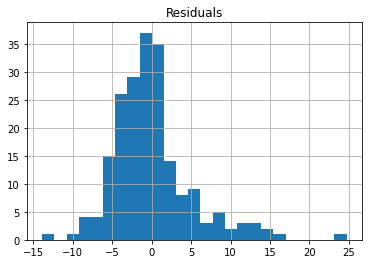

In [11]:
all_residuals = valid_y - best_model.predict(valid_X[best_variables])

# Determine the percentage of datapoints with a residual in [-5, 5] = approx. 75%
print("Percentage of datapoints with a residual in [-5, 5]: ",
      len(all_residuals[(all_residuals > -5) & (all_residuals < 5)]) / len(all_residuals))

pd.DataFrame({"Residuals": all_residuals}).hist(bins=25)
plt.show()

- Stepwise Selection

In [12]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model,
                                                score_model, verbose=True)
print(best_variables)
regression_summary(valid_y, best_model.predict(valid_X[best_variables]))

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1835.00, add NOX
Step: score=1817.90, add DIS
Step: score=1811.82, add ZN
Step: score=1810.16, add CRIM
Step: score=1808.01, add RAD
Step: score=1803.57, add TAX
Step: score=1803.57, unchanged None
['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'DIS', 'ZN', 'CRIM', 'RAD', 'TAX']

Regression statistics

                      Mean Error (ME) : -0.0393
       Root Mean Squared Error (RMSE) : 5.0771
            Mean Absolute Error (MAE) : 3.5746
          Mean Percentage Error (MPE) : -5.1561
Mean Absolute Percentage Error (MAPE) : 16.9733


Percentage of datapoints with a residual in [-5, 5]:  0.7684729064039408


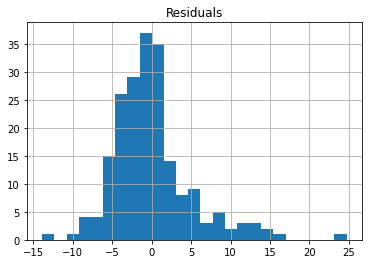

In [13]:
all_residuals = valid_y - best_model.predict(valid_X[best_variables])

# Determine the percentage of datapoints with a residual in [-5, 5] = approx. 75%
print("Percentage of datapoints with a residual in [-5, 5]: ",
      len(all_residuals[(all_residuals > -5) & (all_residuals < 5)]) / len(all_residuals))

pd.DataFrame({"Residuals": all_residuals}).hist(bins=25)
plt.show()

The chosen ten-predictor models from backward, forward and stepwise selection are identical to the best eight-predictor model chosen by the exhaustive search. The variables are:

- CHAS;
- CRIM;
- DIS;
- LSTAT;
- NOX;
- PTRATIO;
- RAD;
- RM;
- TAX;
- ZN;

In this example, forward selection, backward selection and stepwise regression end up with this same ten-predictor model. This need not be the case with other datasets. Besides that, the histogram of errors are the same as the resultant models are the same for all variable selector methods.

Finally, the validation performance of the ten-predictor models is slightly better than the all-predictor model in terms of validation metrics (see below table). This happens because of the multicollinearity effect that regression coefficients suffer - there are variables in the model that have small coefficients relative to the standard deviation of the noise and also exhibit at least moderate correlation with other variables);

                       R_adj       AIC
      ten-predictor: 0.731108    1803.571740
      all-predictor: 0.729557    1807.231231

There is an even smaller model, performing only slightly worse, that is preferable from a parsimony standpoint.

**2.Predicting Software Reselling Profits.** Tayko Software is a software catalog firm that sells games and educational software. It started out as a software manufacturer and then added third-party titles to its offerings. It recently revised its collection of items in a new catalog, which it mailed out to its customers. This mailing yielded 2000 purchases. Based on these data, Tayko wants to devise a model for predicting the spending amount that a purchasing customer will yield. The file `Tayko.csv` contains information on 2000 purchases. The following table describes the variables to be used in the problem (the Excel file contains additional variables).

    FREQ: Number of transactions in the preceding year
    LAST_UPDATE: Number of days since last update to customer record
    WEB: Whether customer purchased by Web order at least once
    GENDER: Male or female
    ADDRESS_RES: Whether it is a residential address
    ADDRESS_US: Whether it is a US address
    SPENDING: Amount spent by customer in (outcome) test mailing ($)

a. Explore the spending amount by creating a pivot table for the categorical variables and computing the average and standard deviation of spending in each category.

In [14]:
columns=["Freq", "last_update_days_ago", "Web order", "Gender=male",
         "Address_is_res", "US", "Spending"]
selling_df = pd.read_csv("../datasets/Tayko.csv")
selling_df = selling_df[columns].copy()
selling_df = selling_df.rename(columns={"Freq": "FREQ",
                                        "last_update_days_ago": "LAST_UPDATE",
                                        "Web order": "WEB",
                                        "Gender=male": "GENDER",
                                        "Address_is_res": "ADDRESS_RES",
                                        "US": "ADDRESS_US",
                                        "Spending": "SPENDING"
                                       })
selling_df.head()

,FREQ,LAST_UPDATE,WEB,GENDER,ADDRESS_RES,ADDRESS_US,SPENDING
0,2,3662,1,0,1,1,128
1,0,2900,1,1,0,1,0
2,2,3883,0,0,0,1,127
3,1,829,0,1,0,1,0
4,1,869,0,0,0,1,0


- Web

In [15]:
selling_df[["WEB", "SPENDING"]].groupby("WEB").agg({"SPENDING": ["mean", "std"]})

SPENDING            
           mean         std
WEB                        
0     82.902439  173.417088
1    129.199531  200.463840

Web spending are higher on average compared to non-web spending;

- Gender

In [16]:
selling_df[["GENDER", "SPENDING"]].groupby("GENDER").agg({"SPENDING": ["mean", "std"]})

SPENDING           
              mean        std
GENDER                       
0       107.339642  190.83233
1        98.350810  183.02006

Male spending are higher on average compared to female spending;

- Address Residential

In [17]:
selling_df[["ADDRESS_RES", "SPENDING"]].groupby("ADDRESS_RES").agg({"SPENDING": ["mean", "std"]})

SPENDING            
                   mean         std
ADDRESS_RES                        
0            105.306162  199.521159
1             93.174208  132.204281

Non-address residential purchases spending are higher on average compared to residential addresses spending;

- Address US

In [18]:
selling_df[["ADDRESS_US", "SPENDING"]].groupby("ADDRESS_US").agg({"SPENDING": ["mean", "std"]})

SPENDING            
                  mean         std
ADDRESS_US                        
0           101.216524  174.844401
1           102.924803  189.275664

Address US purchases spending are almost the same (on average) compared to non-us addresses spending;

b. Explore the relationship between spending and each of the two continuous predictors by creating two scatter plots (Spending vs. Freq, and Spending vs. last_update_days_ago). Does there seem to be a linear relationship?

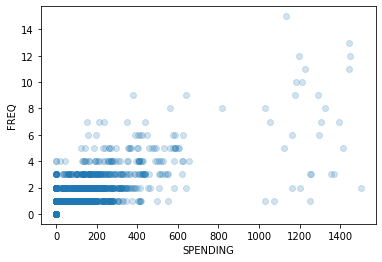

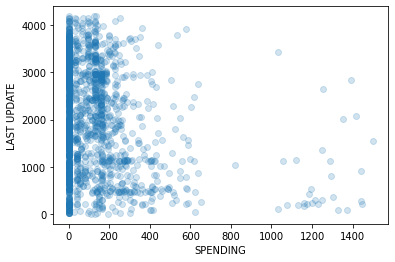

In [19]:
plt.scatter(selling_df.SPENDING, selling_df.FREQ, alpha=0.2)
plt.xlabel("SPENDING")
plt.ylabel("FREQ")
plt.show()

plt.scatter(selling_df.SPENDING, selling_df.LAST_UPDATE, alpha=0.2)
plt.xlabel("SPENDING")
plt.ylabel("LAST UPDATE")
plt.show()

The relationship between spending and frequency of purchase appears appears to be linear, such that when the frequency increases, so does the amount spent. The relationship between spending and last update seems to be less linear. Though it appears to exist a linear relationship between the two variable.

Computing the correlation matrix help us to be sure about such relationships:

In [20]:
selling_df[["FREQ", "LAST_UPDATE", "SPENDING"]].corr()

,FREQ,LAST_UPDATE,SPENDING
FREQ,1.000000,-0.348303,0.691128
LAST_UPDATE,-0.348303,1.000000,-0.256912
SPENDING,0.691128,-0.256912,1.000000


From the correlation matrix it is possible to see that both have a linear relationship, being the spending and frequency of transactions in the previous year a positive and strong correlation and the last update (number of days since last update to customer record) negatively, but no strongly, correlated with spending.

c. To fit a predictive model for Spending:

    i. Partition the 2000 records into training and validation sets.

In [21]:
# select predictors
predictors = ["FREQ", "LAST_UPDATE", "WEB", "GENDER",
              "ADDRESS_RES", "ADDRESS_US"]
outcome = "SPENDING"

# partition data, 40% test set
X = selling_df[predictors]
y = selling_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                                                      test_size=0.4,
                                                      random_state=1)

    ii. Run a multiple linear regression model for Spending vs. all six predictors. Give the estimated
    predictive equation.

In [22]:
selling_lmr = LinearRegression()
selling_lmr.fit(train_X, train_y)

# print coefficients
print(pd.DataFrame({'Predictor': train_X.columns,
                    'coefficient': selling_lmr.coef_}))
# print intercept
print('\nIntercept: ', selling_lmr.intercept_)
# print performance measures (training data)
regression_summary(y, selling_lmr.predict(X))

     Predictor  coefficient
0         FREQ    91.274450
1  LAST_UPDATE    -0.010374
2          WEB    18.628731
3       GENDER    -9.111366
4  ADDRESS_RES   -75.815354
5   ADDRESS_US    -4.620293

Intercept:  10.176297413561059

Regression statistics

               Mean Error (ME) : 2.8773
Root Mean Squared Error (RMSE) : 130.4020
     Mean Absolute Error (MAE) : 81.1267


Therefore, we can write the equation for predicting the selling amount as:

<p>
    <center>
        $\hat{Y}_{SPENDING} = 10.17 + 91.27 x_{FREQ} - 0.01 x_{LAST\_UPDATE} + 18.63 x_{WEB} - 9.11 x_{GENDER} - 75.81 x_{ADD\_RES} - 4.62 x_{ADD\_US}$
    </center>
</p>

    iii. Based on this model, what type of purchaser is most likely to spend a large amount of money?

Users that have a higher number of transactions in the past years, done on web, likely to be male and not purchasing for residential address. The other variables do not influence too much the model (`LAST_UPDATE` and `ADDRESS_US`).

    iv. If we used backward elimination to reduce the number of predictors, which predictor would be dropped
    first from the model?

In [23]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)


all_variables = train_X.columns
best_model, best_variables = backward_elimination(all_variables, train_model, score_model,
                                                  verbose=True)
print(best_variables)
regression_summary(valid_y, best_model.predict(valid_X[best_variables]))

Variables: FREQ, LAST_UPDATE, WEB, GENDER, ADDRESS_RES, ADDRESS_US
Start: score=15028.53
Step: score=15026.76, remove=ADDRESS_US
Step: score=15026.38, remove=GENDER
Step: score=15026.38, remove=None
['FREQ', 'LAST_UPDATE', 'WEB', 'ADDRESS_RES']

Regression statistics

               Mean Error (ME) : 6.9616
Root Mean Squared Error (RMSE) : 136.5274
     Mean Absolute Error (MAE) : 83.4472


According to the backward elimitation the first variable would be `ADDRESS_US`, followed by `GENDER`;

    v. Show how the prediction and the prediction error are computed for the first purchase in the validation
    set.

In [24]:
valid_X.iloc[0, :]

FREQ              2
LAST_UPDATE    1346
WEB               0
GENDER            1
ADDRESS_RES       1
ADDRESS_US        1
Name: 674, dtype: int64

In [25]:
valid_y.iloc[0]

0

The computation would be the following:

<p>
    <center>
        $\hat{Y}_{SPENDING} = 10.17 + 91.27 * 2 - 0.01 * 1346 + 18.63 * 0 - 9.11 * 1 - 75.81 * 1 - 4.62 * 1$
    </center>
</p>

Resulting in a value of \\$89.71. The prediction error would be calculated as follows:

<p>
    <center>
        $err = Y - \hat{Y}_{SPENDING} = 0 - 89.71 = 89.71$
    </center>
</p>


For the first 20 rows we have the following:

In [26]:
selling_lmr_pred = selling_lmr.predict(valid_X)
result = pd.DataFrame({"Predicted": selling_lmr_pred,
                       "Actual": valid_y,
                       "Residual": valid_y - selling_lmr_pred})
print(result.head(20))

       Predicted  Actual     Residual
674    89.214915       0   -89.214915
1699  202.231362     184   -18.231362
1282   49.159303       0   -49.159303
1315  824.841659    1289   464.158341
1210    0.121196       0    -0.121196
1636   86.766675       0   -86.766675
613    58.018614       0   -58.018614
447   247.428569    1255  1007.571431
1131   67.036615       0   -67.036615
808    67.825031       0   -67.825031
1496   -7.098168       0     7.098168
1468  194.814024     411   216.185976
1682  -13.480101       0    13.480101
1149  -32.457046       0    32.457046
442    61.247979       0   -61.247979
1813    4.497885     173   168.502115
654   -46.046854       0    46.046854
1264  -32.315195       0    32.315195
858    80.219048       0   -80.219048
1482   51.783900       0   -51.783900


    vi. Evaluate the predictive accuracy of the model by examining its performance on the validation set.

In [27]:
# print performance measures (validation data)
regression_summary(valid_y, selling_lmr_pred)


Regression statistics

               Mean Error (ME) : 7.1933
Root Mean Squared Error (RMSE) : 136.7397
     Mean Absolute Error (MAE) : 83.6010


    vii. Create a histogram of the model residuals. Do they appear to follow a normal distribution? How does
    this affect the predictive performance of the model?

Percentage of datapoints with a residual in [-250, 250]:  0.9625


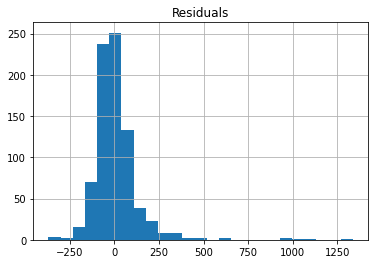

In [28]:
all_residuals = valid_y - selling_lmr.predict(valid_X)

# Determine the percentage of datapoints with a residual in [-250, 250] = approx. 95%
print("Percentage of datapoints with a residual in [-250, 250]: ",
      len(all_residuals[(all_residuals > -250) & (all_residuals < 250)]) / len(all_residuals))

pd.DataFrame({"Residuals": all_residuals}).hist(bins=25)
plt.show()

We can see from the above figure that the residuals follow a normal distribution. The predictions will be unbiased (equal to the true values on average) and will have the smallest mean squared error compared to any unbiased estimates if we make the following assumptions:

**1. The noise ε (or equivalently, Y) follows a normal distribution.**
2. The choice of predictors and their form is correct (linearity).
3. The records are independent of each other.
4. The variability in the outcome values for a given set of predictors is the same regardless of the values of the predictors (homoskedasticity).

Since the noise ε follows a normal distribution, we know that these are the best predictions possible (unbiased).